# Pre-processing

Steps:
* drop `Unnamed: 0` column in each dataset
* separate data in X and y
* scale X data
* 

In [1]:
# Imports
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split


sns.set()

In [2]:
# Load in files
clean_tr_csv = './datasets/clean_train.csv'
clean_tr_df = pd.read_csv(clean_tr_csv)

clean_ts_csv = './datasets/clean_test.csv'
clean_ts_df = pd.read_csv(clean_ts_csv)

### Train test split initial model

In [124]:
clean_tr_df['saleprice'].describe()

count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [3]:
clean_tr_df

,id,ms_subclass,lot_area,overall_qual,overall_cond,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,...,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,saleprice
0,109,60,13517,6,8,533.0,0.0,192.0,725.0,725,...,2.0,475.0,0,44,0,0,0,0,0,130500
1,544,60,11492,7,5,637.0,0.0,276.0,913.0,913,...,2.0,559.0,0,74,0,0,0,0,0,220000
2,153,20,7922,5,7,731.0,0.0,326.0,1057.0,1057,...,1.0,246.0,0,52,0,0,0,0,0,109000
3,318,60,9802,5,5,0.0,0.0,384.0,384.0,744,...,2.0,400.0,100,0,0,0,0,0,0,174000
4,255,50,14235,6,8,0.0,0.0,676.0,676.0,831,...,2.0,484.0,0,59,0,0,0,0,0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,1587,20,11449,8,5,1011.0,0.0,873.0,1884.0,1728,...,2.0,520.0,0,276,0,0,0,0,0,298751
2044,785,30,12342,4,5,262.0,0.0,599.0,861.0,861,...,2.0,539.0,158,0,0,0,0,0,0,82500
2045,916,50,7558,6,6,0.0,0.0,896.0,896.0,1172,...,2.0,342.0,0,0,0,0,0,0,0,177000
2046,639,20,10400,4,5,155.0,750.0,295.0,1200.0,1200,...,1.0,294.0,0,189,140,0,0,0,0,144000


In [4]:
clean_ts_df

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,2658,902301120,190,9142,6,8,1910,1950,0,0,...,440,0,60,112,0,0,0,0,4,2006
1,2718,905108090,90,9662,5,4,1977,1977,0,0,...,580,170,0,0,0,0,0,0,8,2006
2,2414,528218130,60,17104,7,5,2006,2006,554,0,...,426,100,24,0,0,0,0,0,9,2006
3,1989,902207150,30,8520,5,6,1923,2006,0,0,...,480,0,0,184,0,0,0,0,7,2007
4,625,535105100,20,9500,6,5,1963,1963,609,0,...,514,0,76,0,0,185,0,0,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,8000,6,6,1974,1974,931,153,...,488,0,96,0,0,0,0,0,11,2007
874,1234,535126140,60,14670,6,7,1966,1999,575,0,...,480,0,230,0,0,0,0,0,8,2008
875,1373,904100040,20,8250,5,5,1968,1968,250,492,...,322,0,63,0,0,0,0,0,8,2008
876,1672,527425140,20,9000,4,6,1971,1971,616,0,...,528,0,0,0,0,0,0,0,5,2007


In [5]:
clean_ts_df.head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,2658,902301120,190,9142,6,8,1910,1950,0,0,...,440,0,60,112,0,0,0,0,4,2006
1,2718,905108090,90,9662,5,4,1977,1977,0,0,...,580,170,0,0,0,0,0,0,8,2006
2,2414,528218130,60,17104,7,5,2006,2006,554,0,...,426,100,24,0,0,0,0,0,9,2006
3,1989,902207150,30,8520,5,6,1923,2006,0,0,...,480,0,0,184,0,0,0,0,7,2007
4,625,535105100,20,9500,6,5,1963,1963,609,0,...,514,0,76,0,0,185,0,0,7,2009


In [6]:
exclude = ['id', 'saleprice']
features = [col for col in clean_tr_df if col not in exclude]

kaggle_X = clean_tr_df[features]
kaggle_y = clean_tr_df['saleprice']
kaggle_test = clean_ts_df[features]

In [37]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_overfit = poly.fit_transform(kaggle_X)
kaggle_overfit = poly.transform(kaggle_test)

In [8]:
X_overfit.shape

(2048, 464)

In [38]:
kaggle_overfit.shape

(878, 464)

In [9]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X_overfit, kaggle_y, random_state=42)

### Scale data

In [39]:
# Scale our data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

X_overfit_sc = sc.transform(X_overfit)
kaggle_overfit_sc = sc.transform(kaggle_overfit)

In [40]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1536, 464)
y_train shape is: (1536,)
Z_test shape is: (512, 464)
y_test shape is: (512,)


### Linear Regression model

In [13]:
linereg = LinearRegression()

In [14]:
linereg.fit(Z_train, y_train)

LinearRegression()

In [15]:
print(linereg.score(Z_train, y_train))
print(linereg.score(Z_test, y_test))

0.9440112040229237
-1.5315935610314592e+19


In [16]:
print(cross_val_score(linereg, X_overfit_sc, kaggle_y).mean())

-1.2251863437871832e+23


In [173]:
print(mean_squared_error(y_train, linereg.predict(Z_train), squared=False))
print(mean_squared_error(y_test, linereg.predict(Z_test), squared=False))

linereg_rmse_train = mean_squared_error(y_train, linereg.predict(Z_train), squared=False)
linereg_rmse_test = mean_squared_error(y_test, linereg.predict(Z_test), squared=False)

18856.692384291808
304551623468868.1


In [ ]:
lr_preds = linereg.predict()

Our model is amazingly fit to our train data but outrageously incapable of generalizing. Let's do ridge and lasso techniques to decrease the gap in R2 scores.

### Ridge model

In [75]:
ridge_model = Ridge(ridge_cv.alpha_) # changed this from 10
ridge_model.fit(Z_train, y_train)

print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.8738201994671209
0.8702571338878751


In [171]:
print(mean_squared_error(y_train, ridge_model.predict(Z_train), squared=False))
print(mean_squared_error(y_test, ridge_model.predict(Z_test), squared=False))

ridge_rmse_train = mean_squared_error(y_train, ridge_model.predict(Z_train), squared=False)
ridge_rmse_test = mean_squared_error(y_test, ridge_model.predict(Z_test), squared=False)

28135.259160578502
23779.313721734692


This is A HUGE IMPROVEMENT! Let's find a better alpha next. 

### BUT
to make kaggle submission predictions, need to refit this model to X_overfit_sc?

In [71]:
r_alphas = np.logspace(2, 4, 1000) 
# THIS SPLITS THE TRAIN DATA FOR YOU, PASS IT YOUR WHOLE TRAIN DATASET!!!!!! 
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_cv.fit(X_overfit_sc, kaggle_y)

RidgeCV(alphas=array([  100.        ,   100.46204213,   100.9262191 ,   101.39254076,
         101.86101702,   102.33165783,   102.80447321,   103.27947319,
         103.75666787,   104.2360674 ,   104.71768195,   105.20152176,
         105.68759712,   106.17591835,   106.66649583,   107.15933998,
         107.65446128,   108.15187026,   108.65157747,   109.15359353,
         109.65792913,   110.16459496,   110.67360181,   111.18496048,
         111.69868185,   112.21477682,...
        8829.69995549,  8870.49688965,  8911.48232284,  8952.657126  ,
        8994.02217409,  9035.57834614,  9077.32652521,  9119.26759846,
        9161.40245714,  9203.73199662,  9246.25711641,  9288.97872016,
        9331.89771573,  9375.01501515,  9418.33153465,  9461.84819472,
        9505.5659201 ,  9549.48563979,  9593.60828709,  9637.93479962,
        9682.4661193 ,  9727.20319245,  9772.14696973,  9817.29840619,
        9862.65846131,  9908.228099  ,  9954.00828762, 10000.        ]),
        cv=5, scor

In [155]:
ridge_cv.alpha_ 

2439.98629725955

In [156]:
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))
print(ridge_cv.score(X_overfit_sc, kaggle_y))

0.8753558399431995
0.906627211855912
0.8844319676557876


In [157]:
print(mean_squared_error(kaggle_y, ridge_cv.predict(X_overfit_sc), squared=False))

26934.239694826323


### Lasso model

In [158]:
lasso_model = Lasso(alpha=lasso_cv.alpha_) # changed from .1 
lasso_model.fit(Z_train, y_train)

c:\users\derya\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270508943983.17267, tolerance: 975486178.0804485
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [159]:
print(lasso_model.score(Z_train, y_train))
print(lasso_model.score(Z_test, y_test))

0.9412872839491646
0.5086537927057186


In [170]:
print(mean_squared_error(y_train, lasso_model.predict(Z_train), squared=False))
print(mean_squared_error(y_test, lasso_model.predict(Z_test), squared=False))

lasso_rmse_train = mean_squared_error(y_train, lasso_model.predict(Z_train), squared=False)
lasso_rmse_test = mean_squared_error(y_test, lasso_model.predict(Z_test), squared=False)

19309.94504828838
54548.51813464783


### create rmse pd to graph

In [178]:
index = ['linereg', 'ridge', 'lasso']

In [179]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
d = {'col1': [1, 2], 'col2': [3, 4]}

In [237]:
d = {'model':['Linear regression', 'Ridge', 'Lasso'], 'train':[linereg_rmse_train, ridge_rmse_train, lasso_rmse_train], 'test':[linereg_rmse_test, ridge_rmse_test, lasso_rmse_test]}

In [238]:
df = pd.DataFrame(data=d, index=index)

In [239]:
df.head().T

,linereg,ridge,lasso
model,Linear regression,Ridge,Lasso
train,18856.692384,28135.259161,19309.945048
test,304551623468868.125,23779.313722,54548.518135


In [240]:
tidy = df.melt(id_vars='model').rename(columns=str.title)

In [241]:
tidy

,Model,Variable,Value
0,Linear regression,train,1.885669e+04
1,Ridge,train,2.813526e+04
2,Lasso,train,1.930995e+04
3,Linear regression,test,3.045516e+14
4,Ridge,test,2.377931e+04
5,Lasso,test,5.454852e+04


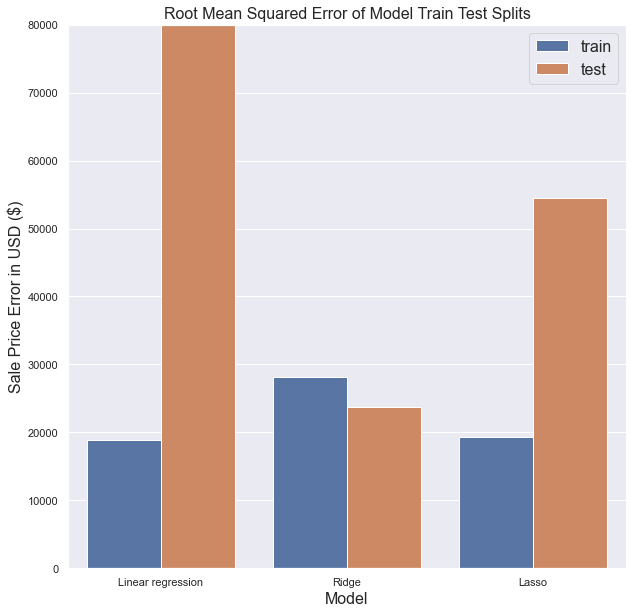

In [267]:
fig, ax = plt.subplots(figsize=(10,10))
plt.ylim(0, 80000)
#ax.set_xlabel('', fontsize=24)
#ax.set_ylabel('', fontsize=24)
#ax.legend(labels=['train', 'test'],fontsize=24)
sns.barplot(x='Model', y='Value', hue='Variable', data=tidy);
plt.xlabel('Model', fontsize=16)
plt.ylabel('Sale Price Error in USD ($)', fontsize=16)
plt.title('Root Mean Squared Error of Model Train Test Splits', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('model_eval.png')

In [105]:
l_alphas = np.logspace(-3, 0, 1000) # ASK DAVID why did we use a range of -3 to 0 --> This is 10^-3 not literally -3!!!
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=1000)
lasso_cv.fit(X_overfit_sc, kaggle_y)

c:\users\derya\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248600509087.3829, tolerance: 1026430467.7392803
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\derya\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237416582292.9642, tolerance: 1026430467.7392803
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\derya\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232236170356.22943, tolerance: 1026430467.7392803
  model = cd_fast.enet_coordinate_descent_gram(
c:\

LassoCV(alphas=array([0.001     , 0.00100694, 0.00101393, 0.00102096, 0.00102804,
       0.00103518, 0.00104236, 0.00104959, 0.00105688, 0.00106421,
       0.00107159, 0.00107903, 0.00108652, 0.00109405, 0.00110165,
       0.00110929, 0.00111699, 0.00112474, 0.00113254, 0.0011404 ,
       0.00114831, 0.00115628, 0.0011643 , 0.00117238, 0.00118052,
       0.00118871, 0.00119696, 0.00120526, 0.00121362, 0.00122204,
       0.001...
       0.79049276, 0.7959777 , 0.8015007 , 0.80706201, 0.81266192,
       0.81830068, 0.82397857, 0.82969585, 0.83545281, 0.8412497 ,
       0.84708683, 0.85296445, 0.85888286, 0.86484233, 0.87084315,
       0.87688561, 0.88297   , 0.8890966 , 0.89526571, 0.90147763,
       0.90773265, 0.91403107, 0.9203732 , 0.92675933, 0.93318977,
       0.93966483, 0.94618482, 0.95275005, 0.95936083, 0.96601748,
       0.97272032, 0.97946967, 0.98626585, 0.99310918, 1.        ]),
        cv=5)

In [164]:
lasso_cv.alpha_

1.0

In [165]:
print(lasso_cv.score(X_overfit_sc, kaggle_y))

0.9398197393351748


In [166]:
print(mean_squared_error(kaggle_y, lasso_cv.predict(X_overfit_sc), squared=False))

19436.268655978965


### this is great!
but it's so great that it makes me wonder, did i do something wrong? 

### Models available for predictions:
* linereg
* ridge_model
* ridge_cv
* lasso_model
* lasso_cv

In [117]:
# final model
X = sc.fit_transform(X_overfit)
kaggle_overfit_sc = sc.transform(kaggle_overfit)

In [118]:
ridge_model = Ridge(ridge_cv.alpha_)
ridge_model.fit(X, kaggle_y)

ridge_pred = ridge_model.predict(kaggle_overfit_sc)
ridge_sub = pd.DataFrame(ridge_pred, index=clean_ts_df['id'])
ridge_sub.columns = ['SalePrice']
ridge_sub.index.names = ['Id']
ridge_sub.to_csv('./datasets/ridge_submission.csv')

In [120]:
ridge_sub.describe()

,SalePrice
count,878.000000
mean,179763.473252
std,70474.065081
min,53115.487712
25%,128480.060137
50%,164740.831453
75%,216140.876480
max,571614.940621


In [119]:
lasso_model = Lasso(alpha=lasso_cv.alpha_)
lasso_model.fit(X, kaggle_y)

lasso_pred = lasso_model.predict(kaggle_overfit_sc)
lasso_sub = pd.DataFrame(lasso_pred, index=clean_ts_df['id'])
lasso_sub.columns = ['SalePrice']
lasso_sub.index.names = ['Id']
lasso_sub.to_csv('./datasets/lasso_submission.csv')

c:\users\derya\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367052046192.59894, tolerance: 1285587599.4432478
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso_model.

In [121]:
lasso_sub.describe()

,SalePrice
count,878.000000
mean,177556.329403
std,80822.414029
min,-155232.632312
25%,124304.965082
50%,158252.926181
75%,213506.051997
max,856747.007223


In [129]:
lasso_sub.query('SalePrice<0')

,SalePrice
Id,
957,-155232.632312
600,-99049.601412


In [142]:
ridge_coefs = list(zip(poly.get_feature_names(kaggle_test.columns), ridge_model.coef_))

In [147]:
for coef in ridge_coefs:
    if coef[1] < 10 and coef[1] > -10:
        print(coef)

('ms_subclass gr_liv_area', 2.910809649595423)
('overall_cond bsmtfin_sf_2', 9.539462175599441)
('bsmtfin_sf_2 1st_flr_sf', 7.566642567170842)
('bsmt_unf_sf bsmt_full_bath', 8.652241841389136)
('bsmt_unf_sf 3ssn_porch', -9.8495114139162)
('low_qual_fin_sf bsmt_half_bath', 0.0)
('low_qual_fin_sf pool_area', 0.0)
('bsmt_full_bath half_bath', 8.992700936872135)
('half_bath wood_deck_sf', 2.9507161660139123)
('garage_cars 3ssn_porch', 3.672574139391789)
('3ssn_porch screen_porch', 0.0)
('3ssn_porch pool_area', 0.0)


In [137]:
lasso_coefs = list(zip(poly.get_feature_names(kaggle_test.columns), lasso_model.coef_))

In [169]:
lasso_coefs_to_drop = []
for coef in lasso_coefs:
    if coef[1] < 1000 and coef[1] > -1000:
        lasso_coefs_to_drop.append(coef[0])

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
submission_df = pd.DataFrame(test_preds, index=clean_ts_df['id'])
submission_df.columns = ['SalePrice']
submission_df.index.names = ['Id']
submission_df.to_csv('./datasets/submission_baseline.csv')

### ElasticNet model - is this necessary?

In [ ]:
# Set up a list of alphas to check.
# Provide 100 different alpha values for it to optimize
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
# specifies how much penalty to take from lasso v ridge
#enet_ratio = 0.5
enet_ratio = np.linspace(0.05, 1.0, 10)

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

In [ ]:
# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

In [ ]:
enet_model.alpha_

In [ ]:
enet_model.l1_ratio_

In [ ]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

In [ ]:
# Reminders
print(" OLS ".center(18, "="))
print(linereg.score(Z_train, y_train))
print(linereg.score(Z_test, y_test))
print()
print(" Ridge ".center(18, "=")) # with an alpha
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))
print()
print(" Ridge CV".center(18, "=")) # with optimal alpha
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))
print()
print(" Lasso CV".center(18, "="))
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

In [ ]:
train_preds = linereg.predict(X_train)
test_preds = linereg.predict(X_test)

In [ ]:
mean_squared_error(y_true=y_train, y_pred=train_preds, squared=False)

### Score the models

In [ ]:
cross_val_score(linereg, X=X_train, y=y_train).mean()

### Refit models to the whole train csv

In [ ]:
kaggle_X = clean_tr_df[features]
kaggle_y = clean_tr_df['saleprice']
kaggle_test = clean_ts_df[features]

### Make Predictions - scale train and test csvs

In [ ]:
lasso_cv.predict(Z_train)

In [ ]:
# Instantiate our model
linereg = LinearRegression()

In [ ]:
linereg.fit(kaggle_X, kaggle_y)

In [ ]:
linereg.score(kaggle_X, kaggle_y)

In [ ]:
pd.DataFrame(list(zip(features, linereg.coef_)), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

# TODO
* INTERPRETATIONS of model scores
* use some ttests and check p-values of model features 

In [ ]:
# Create submission dataframe
#https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
submission_df = pd.DataFrame(test_preds, index=clean_ts_df['id'])

In [ ]:
submission_df.columns = ['SalePrice']
submission_df.index.names = ['Id']

In [ ]:
submission_df

In [ ]:
submission_df = pd.DataFrame(test_preds, index=clean_ts_df['id'])
submission_df.columns = ['SalePrice']
submission_df.index.names = ['Id']
submission_df.to_csv('./datasets/submission_baseline.csv')

In [ ]:
stan = StandardScaler()
stan.fit(X)
X_scaled = stan.transform(X)

In [ ]:
X_scaled

In [ ]:
# And read in test file
test_csv = './datasets/test.csv'
test_df = pd.read_csv(test_csv)